### Programming for Data Analysis - Project

#### By Dmitrijs Gavilovskis

Create a data set by simulating a real-world phenomenon of your choosing.

#### Tasks:

Choose a real-world phenomenon that can be measured and collect at least one-hundred data points across at least four different variables.

Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Synthesise/simulate a data set as closely matching their properties as possible.

Detail the research and implement the simulation in a Jupyter notebook.


### 1. Chosen Real Life Phenomenon

The data that we are going to analyze are <b>property prices in Ireland</b> as per week starting Monday November 23rd 2020.
I have manually collected the following data from the website www.daft.ie - 100 random data points accross 4 cities containing 2 variables - <i>property type</i> and <i>number of bedrooms</i>. 
I would like to investigate the question so as to be able to simulate a dataset that would link <i>property type</i>, <i>number of bedrooms</i> and <i>location<i> and correlate these values to the <i>property price</i>.


##### Location
Data set contains data for 4 cities - Dublin, Limerick, Galway and Cork. As the cities vary in size, I have taken different amount of data for each city.

City   &emsp;&emsp; &emsp;&emsp;        Population     &emsp;&emsp;        Data points  <br>
Dublin        &emsp;&emsp; &emsp;&emsp; 1,024K&emsp;&emsp;  <br>
Cork        &emsp;&emsp;  &emsp;&emsp;    190K  &emsp;&emsp; <br>
Limerick      &emsp;&emsp; &emsp;&emsp;    90K   &emsp;&emsp;  <br>
Galway       &emsp;&emsp;    &emsp;&emsp;  71K   &emsp;&emsp;  <br>


Reference: "Population of cities in Ireland"    https://worldpopulationreview.com/countries/cities/ireland

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv("Ireland_prices.csv")

In [75]:
df

,Property type,Location,Bedrooms
0,a,Limerick,2
1,d,Limerick,4
2,t,Limerick,4
3,d,Limerick,4
4,dp,Limerick,3
...,...,...,...
95,a,Cork,2
96,dp,Cork,3
97,a,Cork,2
98,sd,Cork,3


##### Let us make our data framer easier to understand

In [76]:
df_new = df.replace({"a":"apartment","d":"detached","t":"terraced","dp":"duplex","sd":"semi","tn":"townhouse"})

In [89]:
df_new

,Property type,Location,Bedrooms
0,apartment,Limerick,2
1,detached,Limerick,4
2,terraced,Limerick,4
3,detached,Limerick,4
4,duplex,Limerick,3
...,...,...,...
95,apartment,Cork,2
96,duplex,Cork,3
97,apartment,Cork,2
98,semi,Cork,3


##### Distribution of number of bedrooms

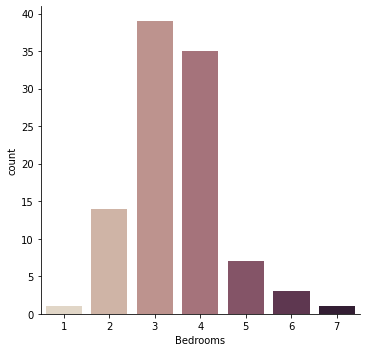

In [90]:
sns.catplot(x="Bedrooms", kind="count", palette="ch:.25", data=df_new);

# Reference: https://seaborn.pydata.org/tutorial/categorical.html

##### Distribution Property type

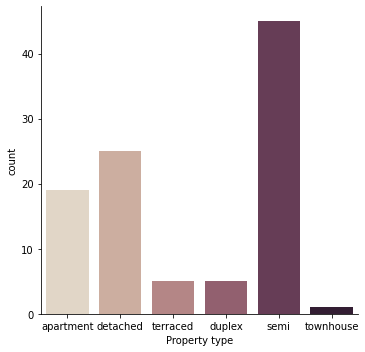

In [94]:
sns.catplot(x="Property type", kind="count", palette="ch:.25", data=df_new);

##### Distribution Location

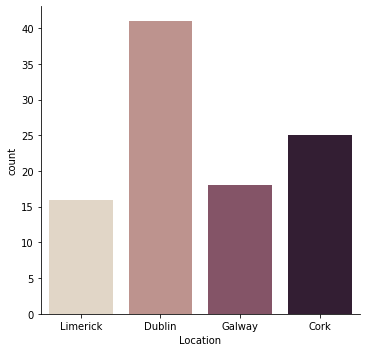

In [95]:
sns.catplot(x="Location", kind="count", palette="ch:.25", data=df_new);

Let us look at data for each city separately
##### Limerick data

In [176]:
Limk = df_new.loc[(df_new['Location'] == "Limerick")] 

In [177]:
Limk

,Property type,Location,Bedrooms
0,apartment,Limerick,2
1,detached,Limerick,4
2,terraced,Limerick,4
3,detached,Limerick,4
4,duplex,Limerick,3
5,terraced,Limerick,3
6,detached,Limerick,3
7,detached,Limerick,4
8,apartment,Limerick,2
9,apartment,Limerick,2


In [178]:
# Applying descriptive stats to look into the data in more details
Limk["Bedrooms"].describe().round(0)

count    16.0
mean      3.0
std       1.0
min       2.0
25%       3.0
50%       3.0
75%       4.0
max       4.0
Name: Bedrooms, dtype: float64

Let us draw 100 samples from a triangular distribution.
The triangular distribution is a continuous probability distribution with lower limit left, peak at mode, and upper limit right. We will enter the lower limit as 1 bedroom, peak at mean = 3 and upper limit at 4.

In [179]:
np.random.seed(3465) # Using seed option so that the numbers are the same 

limkbedrooms = np.random.triangular(1,3,4,100).round(0)

# Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

In [180]:
limkbedrooms

array([3., 3., 3., 2., 4., 3., 3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 2., 2., 3., 1., 3., 2., 3., 4., 3., 2., 3.,
       2., 2., 3., 3., 2., 2., 3., 3., 3., 4., 2., 2., 3., 3., 1., 3., 2.,
       3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 3., 2., 3., 2., 3., 3., 1.,
       2., 3., 3., 3., 3., 2., 3., 4., 3., 1., 3., 2., 3., 3., 3., 2., 3.,
       2., 2., 2., 3., 2., 2., 3., 2., 3., 3., 1., 3., 3., 3., 4.])

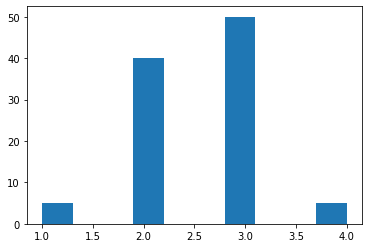

In [181]:
# Plotting a histogram
plt.hist(limkbedrooms);

In [191]:
rating_probs = Limk.groupby('Property type').size().div(len(Limk)).round(2)

# Reference: https://stackoverflow.com/questions/37818063/how-to-calculate-conditional-probability-of-values-in-dataframe-pandas-python

In [199]:
rating_probs

Property type
apartment    0.25
detached     0.31
duplex       0.06
semi         0.25
terraced     0.12
dtype: float64

In [200]:
Property_type = ['apartment', 'detached', 'duplex', 'semi','terraced']
np.random.choice(Property_type, 100, p=[0.25, 0.32, 0.06, 0.25,0.12])

# Reference: https://stackoverflow.com/questions/57435469/how-to-generate-random-categorical-data-in-python-according-to-a-probability-dis
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html#numpy.random.choice

array(['semi', 'apartment', 'detached', 'detached', 'apartment', 'semi',
       'detached', 'apartment', 'detached', 'detached', 'semi', 'semi',
       'detached', 'apartment', 'apartment', 'semi', 'detached',
       'detached', 'detached', 'semi', 'apartment', 'apartment', 'semi',
       'semi', 'apartment', 'semi', 'apartment', 'apartment', 'duplex',
       'detached', 'apartment', 'apartment', 'detached', 'detached',
       'detached', 'duplex', 'detached', 'apartment', 'detached',
       'detached', 'apartment', 'detached', 'detached', 'detached',
       'detached', 'terraced', 'terraced', 'terraced', 'detached',
       'apartment', 'detached', 'semi', 'apartment', 'terraced', 'duplex',
       'detached', 'semi', 'apartment', 'semi', 'detached', 'apartment',
       'semi', 'duplex', 'semi', 'detached', 'apartment', 'semi',
       'terraced', 'duplex', 'semi', 'duplex', 'semi', 'terraced',
       'detached', 'semi', 'semi', 'detached', 'detached', 'semi', 'semi',
       'terraced', 